# EDA & Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 0. Importing data

Data source: https://www.kaggle.com/competitions/GiveMeSomeCredit

In [2]:
credit_data = pd.read_csv("data/cs-training.csv")
credit_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
credit_data.drop(columns=['Unnamed: 0'], inplace=True)

# 1. Check the data

In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
# check for any duplicates

credit_data[credit_data.duplicated(keep=False)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
52,0,1.0,62,0,0.0,NaN,1,0,0,0,0.0
331,0,1.0,29,0,0.0,NaN,0,0,0,0,0.0
530,0,0.0,82,0,0.0,NaN,3,0,0,0,0.0
1250,0,0.0,84,0,0.0,NaN,1,0,0,0,0.0
1669,0,1.0,29,0,0.0,NaN,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149139,0,0.0,77,0,0.0,NaN,2,0,0,0,0.0
149431,0,1.0,25,0,0.0,NaN,1,0,0,0,NaN
149472,0,1.0,84,0,0.0,NaN,1,0,0,0,0.0
149769,0,1.0,23,98,0.0,NaN,0,98,0,98,NaN


There are null values in the MonthlyIncome and NumberOfDependents columns.

There are duplicated observations.

In [6]:
credit_data.drop_duplicates(inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
def split_input_output(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

X, y = split_input_output(data = credit_data,
                          target_column = "SeriousDlqin2yrs")

In [9]:
# the proportion of rejected credit
y.mean()

0.06699868131279663

In [10]:
# split into train & test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 20230703)

# 2. Cleaning the data

## 2(a) Treating NumberOfDependents

We will fill the NaN values on NumberOfDependents with its mode.

In [11]:
num_dependents_mode = float(X_train["NumberOfDependents"].mode())

/tmp/ipykernel_1978/1425465362.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  num_dependents_mode = float(X_train["NumberOfDependents"].mode())


In [12]:
type(num_dependents_mode)

float

In [13]:
#X_train.is_copy = False
#X_test.is_copy = False

col = "NumberOfDependents"

for dataset in [X_train, X_test]:
    dataset[col] = dataset[col].fillna(num_dependents_mode)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119512 entries, 80307 to 140296
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  119512 non-null  float64
 1   age                                   119512 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  119512 non-null  int64  
 3   DebtRatio                             119512 non-null  float64
 4   MonthlyIncome                         96160 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       119512 non-null  int64  
 6   NumberOfTimes90DaysLate               119512 non-null  int64  
 7   NumberRealEstateLoansOrLines          119512 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  119512 non-null  int64  
 9   NumberOfDependents                    119512 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 10.0 MB


## 2(b) Treating MonthlyIncome

It seems that all customers with NaN MonthlyIncome have integer DebtRatio. But to calculate DebtRatio (which is equal to Monthly Debt Payments/Monthly Income), MonthlyIncome is needed. It is safe to assume that for these NaN MonthlyIncome customers, their DebtRatio is in reality just a rough estimate. 

Moreover, these NaN MonthlyIncome customers have large DebtRatio.

Due to this, we may guess that these customers are actually businesses (with no exact monthly income), and that the customers with available MonthlyIncome are actually personal customers.

In [15]:
for data in [X_train, X_test, credit_data]:
    null_income = data["MonthlyIncome"].isna()
    data["TypeCustomer"] = np.where(null_income, 1, 0)
    # 1 is Business
    # 0 is Personal
    data["MonthlyIncome"] = data["MonthlyIncome"].fillna(0) # fill 0 income for Business

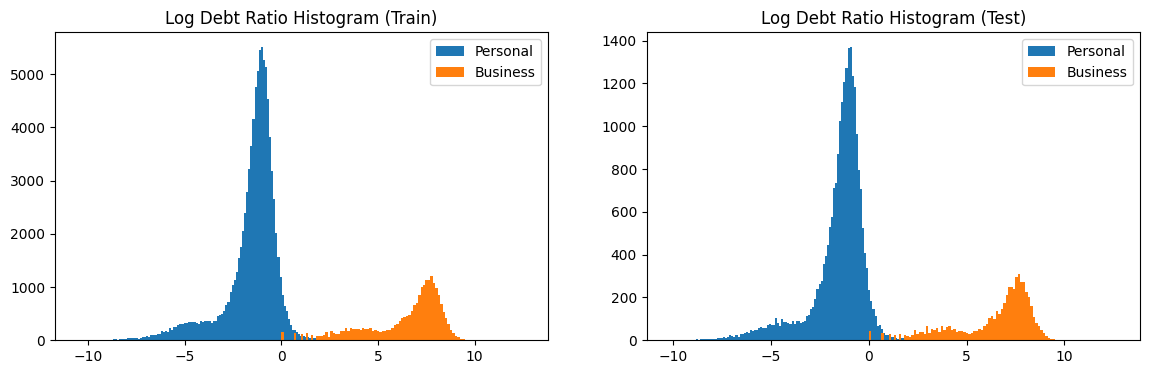

In [16]:
pers = X_train["TypeCustomer"] == 0
personal = pers
nonzero_dr = X_train["DebtRatio"] > 0

fig, ax = plt.subplots(1,2, figsize=(14,4))

for i, dataset in enumerate([X_train, X_test]):
    pers = dataset["TypeCustomer"] == 0
    personal = pers
    nonzero_dr = dataset["DebtRatio"] > 0

    ax[i].hist(x=np.log(dataset[pers & nonzero_dr]["DebtRatio"]), bins=200, label='Personal')
    ax[i].hist(x=np.log(dataset[~pers & nonzero_dr]["DebtRatio"]), bins=100, label='Business')
    ax[i].legend()
    
ax[0].set_title("Log Debt Ratio Histogram (Train)")
ax[1].set_title("Log Debt Ratio Histogram (Test)")
plt.show()

Now let's try to fix other columns.

## 2(c) Treating NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse & NumberOfTimes90DaysLate

For these columns, there are observations with extremely large values which doesn't make sense.

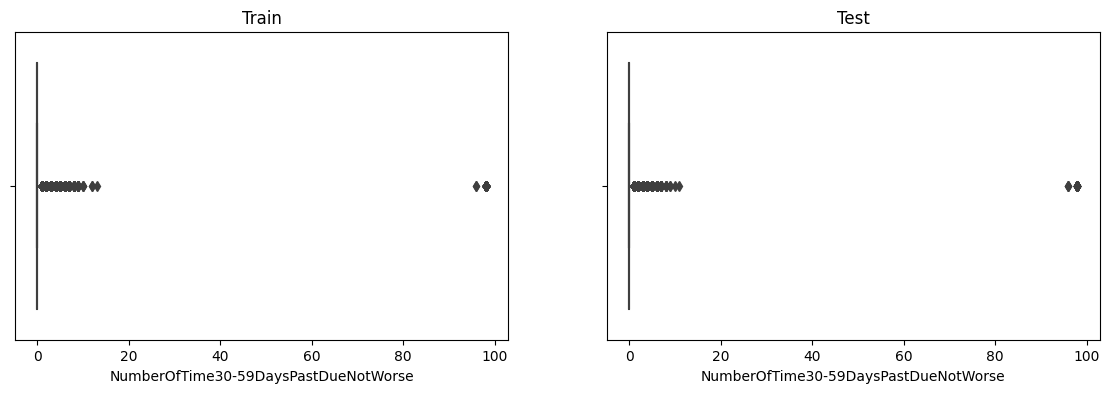

In [17]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

for i, dataset in enumerate([X_train, X_test]):
    sns.boxplot(data=dataset, x="NumberOfTime30-59DaysPastDueNotWorse", ax=ax[i])
    
ax[0].set_title("Train")
ax[1].set_title("Test")
plt.show()

In [18]:
large_val = credit_data["NumberOfTime30-59DaysPastDueNotWorse"].max()
large_val

98

In [19]:
X_train[(X_train["NumberOfTime30-59DaysPastDueNotWorse"] > 80)]["NumberOfTime30-59DaysPastDueNotWorse"].min()

96

In [20]:
large_val_obs = X_train["NumberOfTime30-59DaysPastDueNotWorse"] > 80
X_train[large_val_obs]["age"].min()

21

It doesn't make any sense for a 21-year-old to have 98 times of 30-59 days past payments $98\times 30/365 = 8.05$; it doesn't make sense for a 21-year-old to have started making credit payment from the age 13. 

For these type of observations, we impute these large values with the mode (which is 0).

In [21]:
num_30_past_mode = float(X_train["NumberOfTime30-59DaysPastDueNotWorse"].mode())

/tmp/ipykernel_1978/915158400.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  num_30_past_mode = float(X_train["NumberOfTime30-59DaysPastDueNotWorse"].mode())


In [22]:
col = "NumberOfTime30-59DaysPastDueNotWorse"

for dataset in [X_train, X_test, credit_data]:
    dataset[col] = np.where(dataset[col] > 20,
                            num_30_past_mode, 
                            dataset[col])

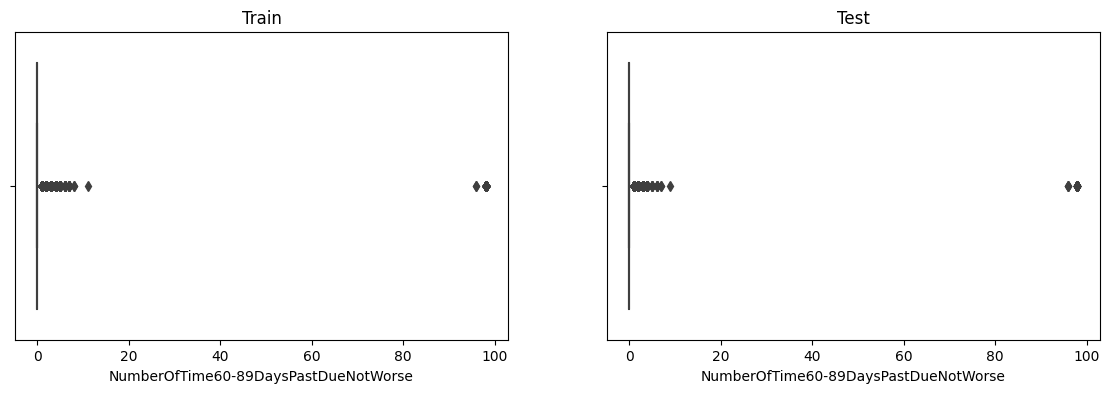

In [23]:
col = "NumberOfTime60-89DaysPastDueNotWorse"
fig, ax = plt.subplots(1,2, figsize=(14,4))

for i, dataset in enumerate([X_train, X_test]):
    sns.boxplot(data=dataset, x=col, ax=ax[i])
    
ax[0].set_title("Train")
ax[1].set_title("Test")
plt.show()

In [24]:
num_60_past_mode = float(X_train["NumberOfTime60-89DaysPastDueNotWorse"].mode())

/tmp/ipykernel_1978/3824277818.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  num_60_past_mode = float(X_train["NumberOfTime60-89DaysPastDueNotWorse"].mode())


In [25]:
col = "NumberOfTime60-89DaysPastDueNotWorse"

for dataset in [X_train, X_test, credit_data]:
    dataset[col] = np.where(dataset[col] > 20,
                            num_60_past_mode, 
                            dataset[col])

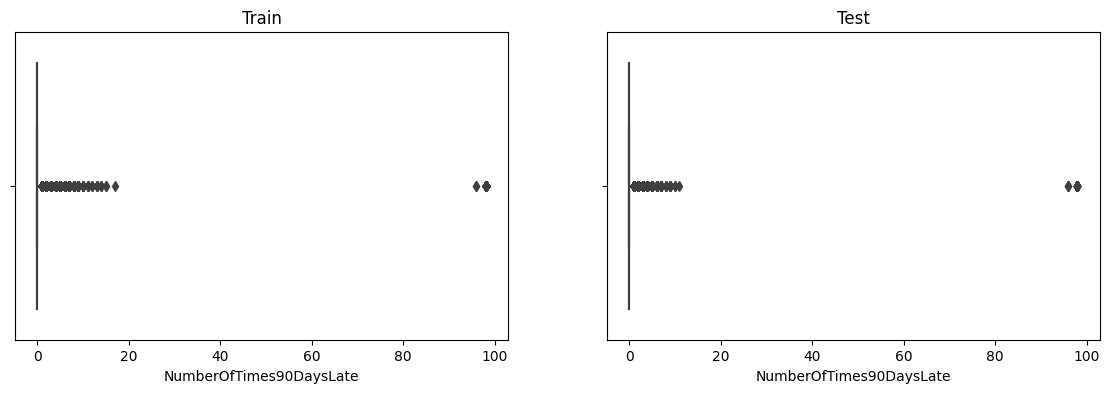

In [26]:
col = "NumberOfTimes90DaysLate"
fig, ax = plt.subplots(1,2, figsize=(14,4))

for i, dataset in enumerate([X_train, X_test]):
    sns.boxplot(data=dataset, x=col, ax=ax[i])
    
ax[0].set_title("Train")
ax[1].set_title("Test")
plt.show()

In [27]:
num_90_past_mode = float(X_train["NumberOfTimes90DaysLate"].mode())

/tmp/ipykernel_1978/939616288.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  num_90_past_mode = float(X_train["NumberOfTimes90DaysLate"].mode())


In [28]:
col ="NumberOfTimes90DaysLate"

for dataset in [X_train, X_test, credit_data]:
    dataset[col] = np.where(dataset[col] > 20,
                            num_90_past_mode, 
                            dataset[col])

## 2(d) Treating Age

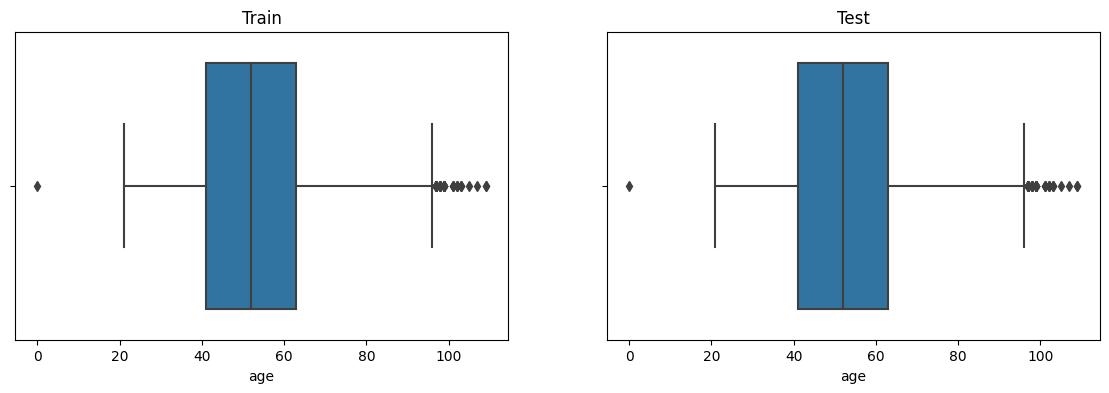

In [29]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
data_group = ["Train", "Test"]

for i, dataset in enumerate([X_train, X_test]):
    sns.boxplot(data=credit_data, x="age", ax=ax[i])
    ax[i].set_title(data_group[i])
    
plt.show()

In [30]:
X_train[X_train["age"]==0]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TypeCustomer
65695,1.0,0,1.0,0.436927,6000.0,6,0.0,2,0.0,2.0,0


In [31]:
X_test[X_test["age"]==0]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TypeCustomer


It doesn't make sense for a newborn baby to have a monthly income & open credit lines. So we impute this age value with the median.

In [32]:
age_median = X_train["age"].median()
X_train["age"].replace(0, age_median, inplace=True)
credit_data["age"].replace(0, age_median, inplace=True)

# 3. Saving train & test dataset

In [33]:
X_train.to_csv("data/X_train.csv")
y_train.to_csv("data/y_train.csv")

X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

# 4. EDA

In [34]:
col =  ['NumberOfOpenCreditLinesAndLoans',
        'NumberRealEstateLoansOrLines',
        'NumberOfTime30-59DaysPastDueNotWorse',
        'NumberOfTime60-89DaysPastDueNotWorse',
        'NumberOfTimes90DaysLate',
        'RevolvingUtilizationOfUnsecuredLines',
        'DebtRatio',
        'MonthlyIncome']

credit_data[col].describe().T

,count,mean,std,min,25%,50%,75%,max
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,5.000000,8.000000,11.000000,58.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.246354,0.698475,0.0,0.000000,0.000000,0.000000,13.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.064970,0.330434,0.0,0.000000,0.000000,0.000000,11.0
NumberOfTimes90DaysLate,149391.0,0.090588,0.485998,0.0,0.000000,0.000000,0.000000,17.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.030132,0.154235,0.556494,50708.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.177441,0.368234,0.875279,329664.0
MonthlyIncome,149391.0,5369.443668,13174.573006,0.0,1600.000000,4400.000000,7400.000000,3008750.0


# 4. Discrete Features Analysis

In [35]:
discrete = ['SeriousDlqin2yrs',
            'NumberOfOpenCreditLinesAndLoans',
            'NumberOfDependents',
            'NumberRealEstateLoansOrLines',
            'NumberOfTime30-59DaysPastDueNotWorse',
            'NumberOfTime60-89DaysPastDueNotWorse',
            'NumberOfTimes90DaysLate']

credit_data[discrete].describe()

,SeriousDlqin2yrs,NumberOfOpenCreditLinesAndLoans,NumberOfDependents,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,149391.000000,149391.000000,145563.000000,149391.000000,149391.000000,149391.000000,149391.000000
mean,0.066999,8.480892,0.759863,1.022391,0.246354,0.064970,0.090588
std,0.250021,5.136515,1.116141,1.130196,0.698475,0.330434,0.485998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,11.000000,1.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,58.000000,20.000000,54.000000,13.000000,11.000000,17.000000


## 4(a) SeriousDlqin2yrs & TypeCustomer

The SeriousDlqin2yrs column described whether a customer is flagged (labeled 1) for experiencing 90 days past due delinquency or worse in the last 2 years.

The TypeCustomer column is derived from MonthlyIncome; if MonthlyIncome is NaN-valued, then the TypeCustomer is 'Business', otherwise 'Personal'.

In [36]:
flagged = (credit_data["SeriousDlqin2yrs"] == 1)
prob_flagged = flagged.mean()

print(f"Probability of Being Flagged = {prob_flagged}")

Probability of Being Flagged = 0.06699868131279663


In [37]:
pers = (credit_data["TypeCustomer"] == 0)
prob_pers = pers.mean()
bus = (credit_data["TypeCustomer"] == 1)
prob_bus = bus.mean()

print(f"Probability of \'Personal\' Customer Type = {prob_pers}")
print(f"Probability of \'Business\' Customer Type = {prob_bus}")

Probability of 'Personal' Customer Type = 0.8043991940612218
Probability of 'Business' Customer Type = 0.1956008059387781


## 4(b) NumberOfOpenCreditLinesAndLoans

<Axes: xlabel='NumberOfOpenCreditLinesAndLoans'>

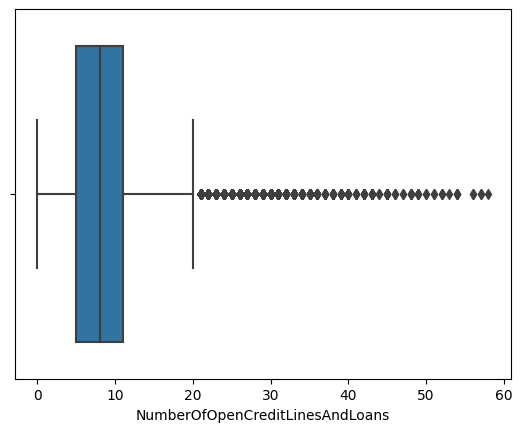

In [38]:
sns.boxplot(data=credit_data, x="NumberOfOpenCreditLinesAndLoans")

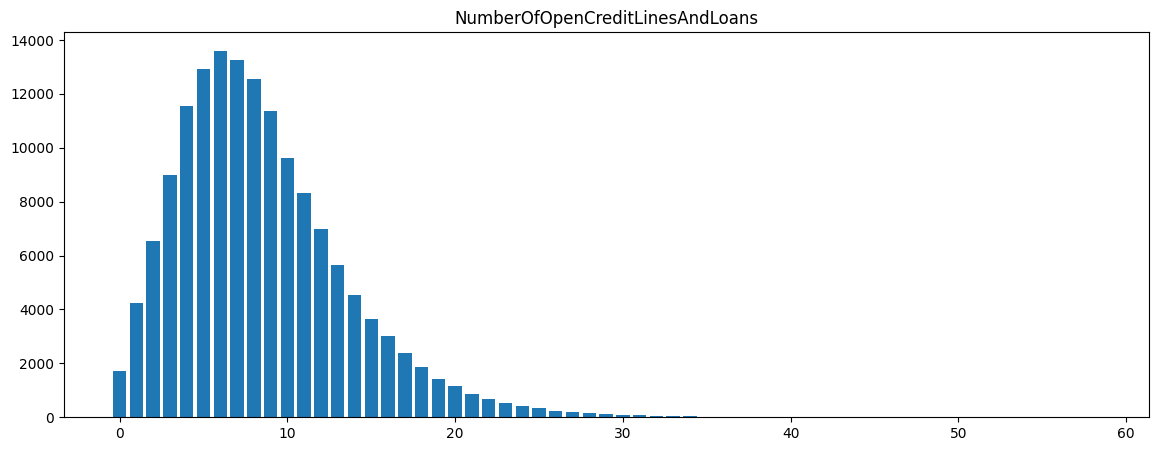

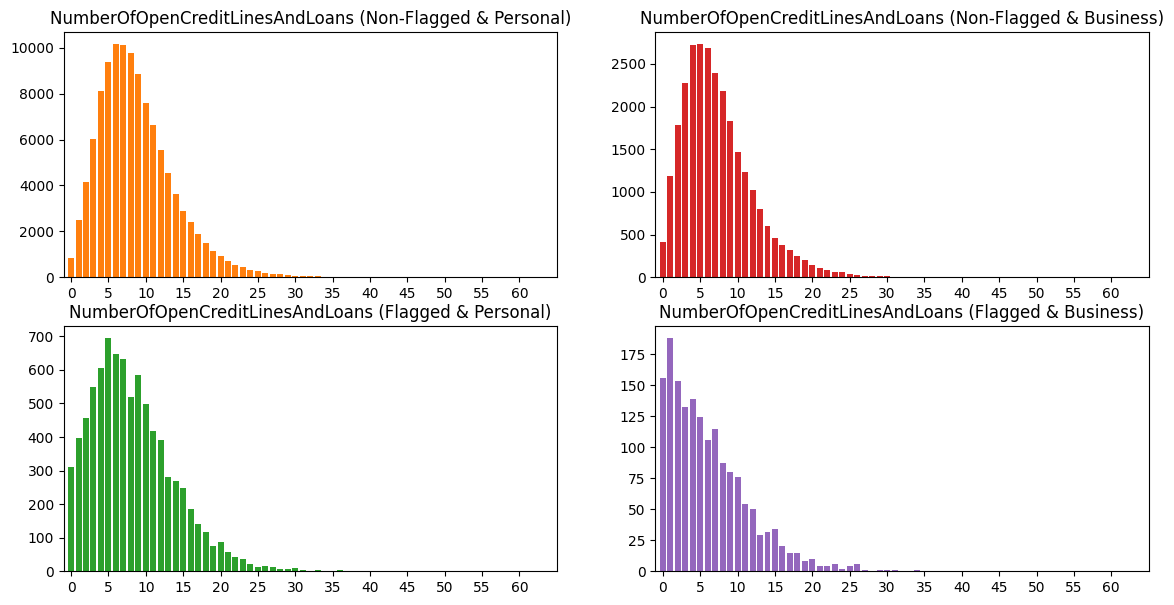

In [39]:
plt.figure(figsize=(14,5))
plt.bar(*np.unique(credit_data["NumberOfOpenCreditLinesAndLoans"], return_counts=True))
plt.title("NumberOfOpenCreditLinesAndLoans")
plt.show()

fig, ax = plt.subplots(2,2, figsize=(14,7))

ax[0,0].bar(*np.unique(credit_data[~flagged & pers]["NumberOfOpenCreditLinesAndLoans"], return_counts=True),
           color='C1')
ax[0,0].set_title("NumberOfOpenCreditLinesAndLoans (Non-Flagged & Personal)")

ax[1,0].bar(*np.unique(credit_data[flagged & pers]["NumberOfOpenCreditLinesAndLoans"], return_counts=True),
           color='C2')
ax[1,0].set_title("NumberOfOpenCreditLinesAndLoans (Flagged & Personal)")

ax[0,1].bar(*np.unique(credit_data[~flagged & ~pers]["NumberOfOpenCreditLinesAndLoans"], return_counts=True),
           color='C3')
ax[0,1].set_title("NumberOfOpenCreditLinesAndLoans (Non-Flagged & Business)")

ax[1,1].bar(*np.unique(credit_data[flagged & ~pers]["NumberOfOpenCreditLinesAndLoans"], return_counts=True),
           color='C4')
ax[1,1].set_title("NumberOfOpenCreditLinesAndLoans (Flagged & Business)")

for axes in ax.reshape(-1):
    axes.set_xlim([-1,65])
    axes.set_xticks(np.arange(0,65,5))

plt.show()


It seems that the distribution of NumberOfOpenCreditLinesAndLoans is shifted to the left if the customer is flagged (experienced 90 days past due delinquency or worse)

In [40]:
credit_data["NumberOfOpenCreditLinesAndLoans"].median()

8.0

In [41]:
zero_num_cred_lines = (credit_data["NumberOfOpenCreditLinesAndLoans"] == 0)
prob_zero_num_cred_lines = zero_num_cred_lines.mean()
prob_flagged = flagged.mean()

print(f"Probability of Zero Number of Credit Lines = {prob_zero_num_cred_lines}")
print(f"Probability of Flagged = {prob_flagged}\n")

p1 = (zero_num_cred_lines & flagged).mean()/(flagged).mean()
print(f"Probability of Zero Num of Cred Lines, conditioned on Flagged = {p1}")

p2 = (zero_num_cred_lines & flagged).mean()/(zero_num_cred_lines).mean()
print(f"Probability of Flagged, conditioned on Zero Num of Cred Lines = {p2}\n")

p3 = (zero_num_cred_lines & flagged & personal).mean()/(flagged & personal).mean()
print(f"Probability of Zero Num of Cred Lines, conditioned on Flagged & Personal = {p3}")

p4 = (zero_num_cred_lines & flagged & personal).mean()/(zero_num_cred_lines & personal).mean()
print(f"Probability of Flagged, conditioned on Zero Num of Cred Lines & Personal = {p4}\n")

p5 = (zero_num_cred_lines & flagged & ~personal).mean()/(flagged & ~personal).mean()
print(f"Probability of Zero Num of Cred Lines, conditioned on Flagged & Business = {p5}")

p6 = (zero_num_cred_lines & flagged & ~personal).mean()/(zero_num_cred_lines & ~personal).mean()
print(f"Probability of Flagged, conditioned on Zero Num of Cred Lines & Business = {p6}\n")


Probability of Zero Number of Credit Lines = 0.011459860366421003
Probability of Flagged = 0.06699868131279663

Probability of Zero Num of Cred Lines, conditioned on Flagged = 0.04675791787391347
Probability of Flagged, conditioned on Zero Num of Cred Lines = 0.2733644859813084

Probability of Zero Num of Cred Lines, conditioned on Flagged & Personal = 0.03685800604229607
Probability of Flagged, conditioned on Zero Num of Cred Lines & Personal = 0.2785388127853881

Probability of Zero Num of Cred Lines, conditioned on Flagged & Business = 0.10951008645533142
Probability of Flagged, conditioned on Zero Num of Cred Lines & Business = 0.3015873015873016



From the results above, the odds that a customer is flagged will increase four times if they have zero number of open credit lines and loans.

## 4(c) NumberOfDependents

<Axes: xlabel='NumberOfDependents'>

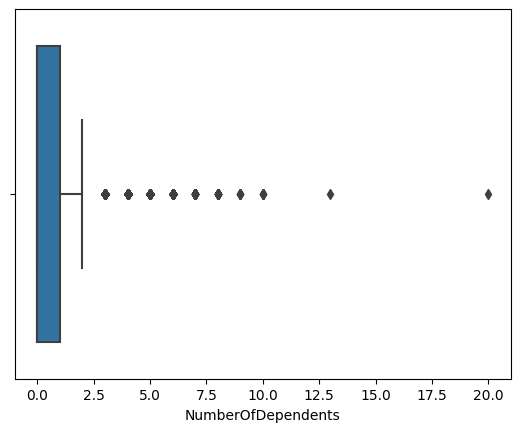

In [42]:
sns.boxplot(data=credit_data, x="NumberOfDependents")

In [43]:
credit_data[credit_data["NumberOfDependents"] > 15]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TypeCustomer
6299,0,0.226616,40,1.0,0.576539,6316.0,11,2.0,1,0.0,20.0,0


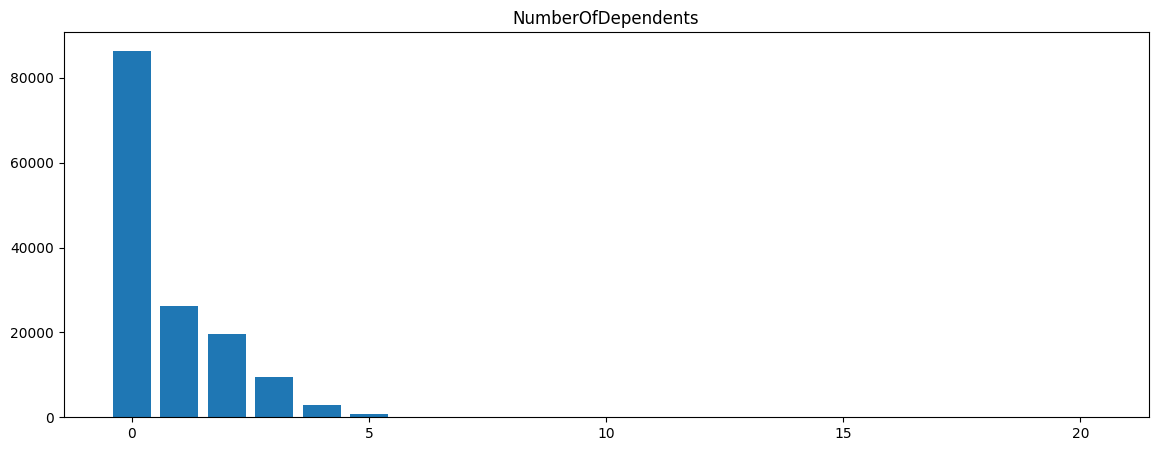

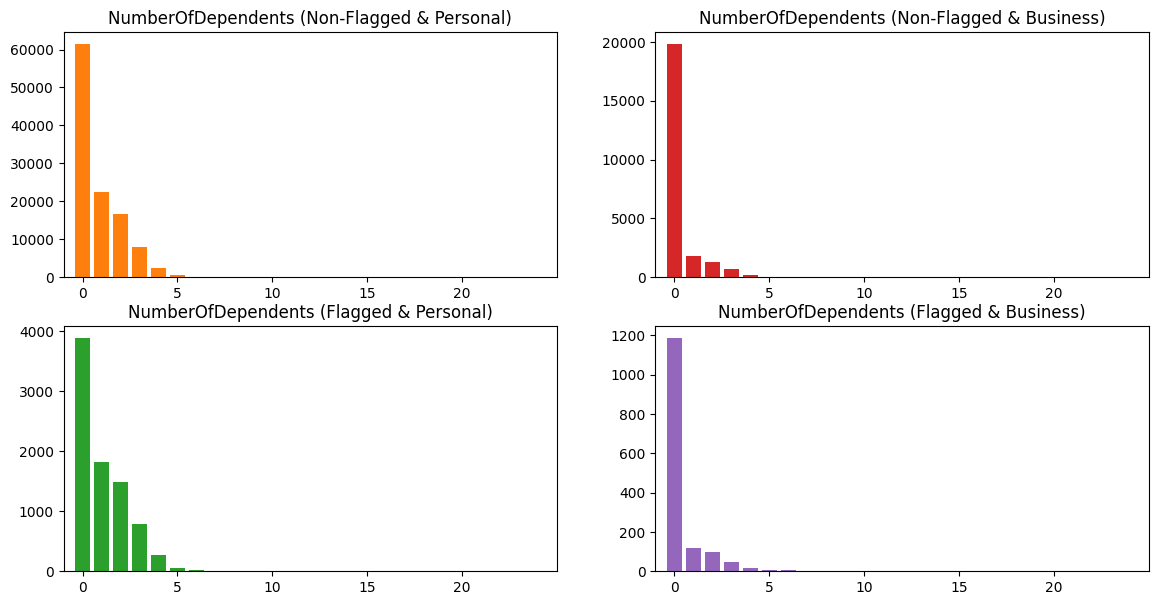

In [44]:
plt.figure(figsize=(14,5))
plt.bar(*np.unique(credit_data["NumberOfDependents"], return_counts=True))
plt.title("NumberOfDependents")
plt.show()

fig, ax = plt.subplots(2,2, figsize=(14,7))

ax[0,0].bar(*np.unique(credit_data[~flagged & pers]["NumberOfDependents"], return_counts=True),
           color='C1')
ax[0,0].set_title("NumberOfDependents (Non-Flagged & Personal)")

ax[1,0].bar(*np.unique(credit_data[flagged & pers]["NumberOfDependents"], return_counts=True),
           color='C2')
ax[1,0].set_title("NumberOfDependents (Flagged & Personal)")

ax[0,1].bar(*np.unique(credit_data[~flagged & ~pers]["NumberOfDependents"], return_counts=True),
           color='C3')
ax[0,1].set_title("NumberOfDependents (Non-Flagged & Business)")

ax[1,1].bar(*np.unique(credit_data[flagged & ~pers]["NumberOfDependents"], return_counts=True),
           color='C4')
ax[1,1].set_title("NumberOfDependents (Flagged & Business)")

for axes in ax.reshape(-1):
    axes.set_xlim([-1,25])
    axes.set_xticks(np.arange(0,25,5))

plt.show()

In [45]:
zero_num_depend = (credit_data["NumberOfDependents"] == 0)

prob_zero_num_depend = zero_num_depend.mean()
prob_flagged = flagged.mean()
print(f"Probability of Zero Number of Dependents = {prob_zero_num_depend}")
print(f"Probability of Flagged = {prob_flagged}\n")

p2 = (zero_num_depend & flagged).mean()/(zero_num_depend).mean()
print(f"Probability of Flagged, conditioned on Zero Num of Dependents = {p2}\n")

p4 = (zero_num_depend & flagged & personal).mean()/(zero_num_depend & personal).mean()
print(f"Probability of Flagged, conditioned on Zero Num of Dependents & Personal = {p4}\n")

p6 = (zero_num_depend & flagged & ~personal).mean()/(zero_num_depend & ~personal).mean()
print(f"Probability of Flagged, conditioned on Zero Num of Dependents & Business = {p6}\n")


Probability of Zero Number of Dependents = 0.5782945425092543
Probability of Flagged = 0.06699868131279663

Probability of Flagged, conditioned on Zero Num of Dependents = 0.058790165756088524

Probability of Flagged, conditioned on Zero Num of Dependents & Personal = 0.0563944530046225

Probability of Flagged, conditioned on Zero Num of Dependents & Business = 0.05830765584261674



From the result above, having zero number of dependents doesn't really change the odds of being flagged.

## 4(d) NumberRealEstateLoansOrLines

<Axes: xlabel='NumberRealEstateLoansOrLines'>

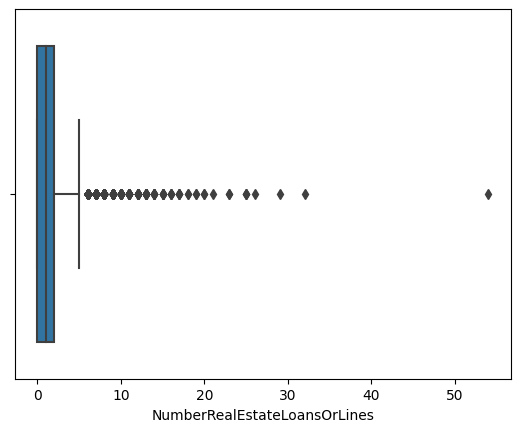

In [46]:
greater_5 = credit_data["NumberRealEstateLoansOrLines"] > 5

sns.boxplot(data=credit_data, x="NumberRealEstateLoansOrLines")

In [47]:
greater_5.mean()

0.005308218031876083

In [48]:
greater_50 = credit_data["NumberRealEstateLoansOrLines"] > 50

credit_data[greater_5]["SeriousDlqin2yrs"].mean()

0.17906683480453972

In [49]:
estate_mean = credit_data[~greater_5]["NumberRealEstateLoansOrLines"].mean()
estate_var = credit_data[~greater_5]["NumberRealEstateLoansOrLines"].var()

print(f'''Excluding the outlier (>5),
Mean of NumberRealEstateLoansOrLines = {estate_mean}
Variance of NumberRealEstateLoansOrLines = {estate_var}''')

Excluding the outlier (>5),
Mean of NumberRealEstateLoansOrLines = 0.9852555216086354
Variance of NumberRealEstateLoansOrLines = 0.9611411727547966


In [50]:
from scipy.special import factorial
from numpy import exp

x_range = np.array([n for n in range(6)])
lambd = estate_mean
poi_pmf = np.array([(lambd**n)*exp(-lambd)/factorial(n) for n in range(6)])
poi_count = 150_000*poi_pmf

In [51]:
poi_count

array([56001.57260022, 55175.85862313, 27181.15968397,  8926.79588745,
        2198.7937346 ,   433.27473358])

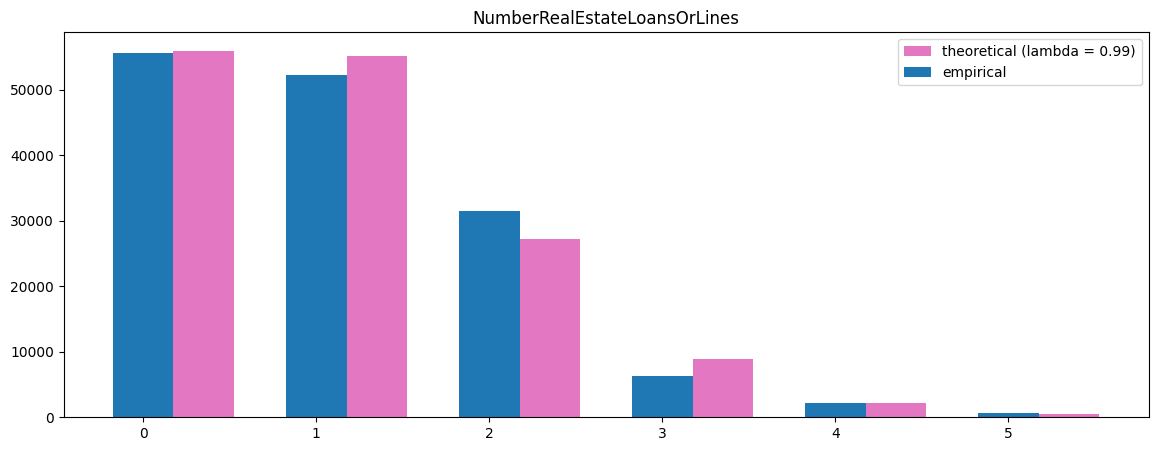

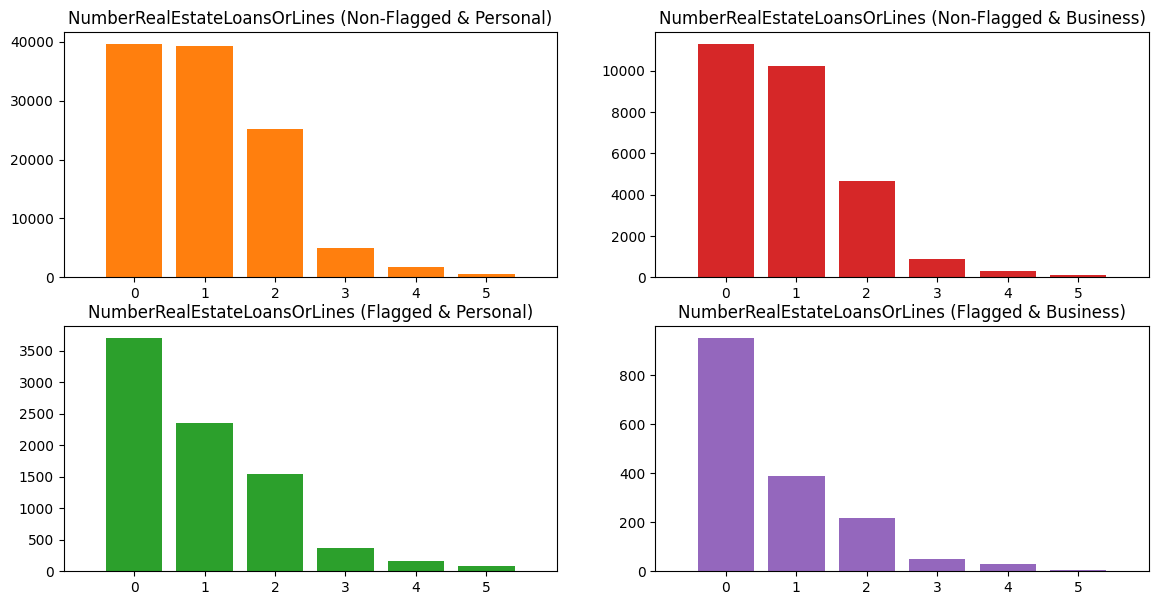

In [52]:
plt.figure(figsize=(14,5))
bar_width = 0.35
plt.bar(*(x_range+bar_width, poi_count), color='C6', width=bar_width, 
        label=f'theoretical (lambda = {lambd:1.2f})')
plt.bar(*np.unique(credit_data[~greater_5]["NumberRealEstateLoansOrLines"], return_counts=True), 
        width=bar_width, label='empirical')
plt.title("NumberRealEstateLoansOrLines")
plt.legend()
plt.show()

fig, ax = plt.subplots(2,2, figsize=(14,7))

ax[0,0].bar(*np.unique(credit_data[~flagged & pers & ~greater_5]["NumberRealEstateLoansOrLines"], return_counts=True),
           color='C1')
ax[0,0].set_title("NumberRealEstateLoansOrLines (Non-Flagged & Personal)")

ax[1,0].bar(*np.unique(credit_data[flagged & pers & ~greater_5]["NumberRealEstateLoansOrLines"], return_counts=True),
           color='C2')
ax[1,0].set_title("NumberRealEstateLoansOrLines (Flagged & Personal)")

ax[0,1].bar(*np.unique(credit_data[~flagged & ~pers & ~greater_5]["NumberRealEstateLoansOrLines"], return_counts=True),
           color='C3')
ax[0,1].set_title("NumberRealEstateLoansOrLines (Non-Flagged & Business)")

ax[1,1].bar(*np.unique(credit_data[flagged & ~pers & ~greater_5]["NumberRealEstateLoansOrLines"], return_counts=True),
           color='C4')
ax[1,1].set_title("NumberRealEstateLoansOrLines (Flagged & Business)")

for axes in ax.reshape(-1):
    axes.set_xlim([-1,6])
    axes.set_xticks(np.arange(0,6,1))

plt.show()

In [53]:
zero_num_real_est = (credit_data["NumberRealEstateLoansOrLines"] == 0)

prob_greater_5 = greater_5.mean()
prob_flagged = flagged.mean()
print(f"Probability of >5 Number of Real Est. Loans = {prob_greater_5}")
print(f"Probability of Flagged = {prob_flagged}\n")

p2 = (greater_5 & flagged).mean()/(greater_5).mean()
print(f"Probability of Flagged, conditioned on >5 Num of Real Est. Loans = {p2}\n")

p4 = (greater_5 & flagged & personal).mean()/(greater_5 & personal).mean()
print(f"Probability of Flagged, conditioned on >5 Num of Real Est. Loans & Personal = {p4}\n")

p6 = (greater_5 & flagged & ~personal).mean()/(greater_5 & ~personal).mean()
print(f"Probability of Flagged, conditioned on >5 Num of Real Est. Loans & Business = {p6}\n")


Probability of >5 Number of Real Est. Loans = 0.005308218031876083
Probability of Flagged = 0.06699868131279663

Probability of Flagged, conditioned on >5 Num of Real Est. Loans = 0.17906683480453972

Probability of Flagged, conditioned on >5 Num of Real Est. Loans & Personal = 0.18320610687022904

Probability of Flagged, conditioned on >5 Num of Real Est. Loans & Business = 0.13636363636363638



## 4(e) NumberOfTime30-59DaysPastDueNotWorse

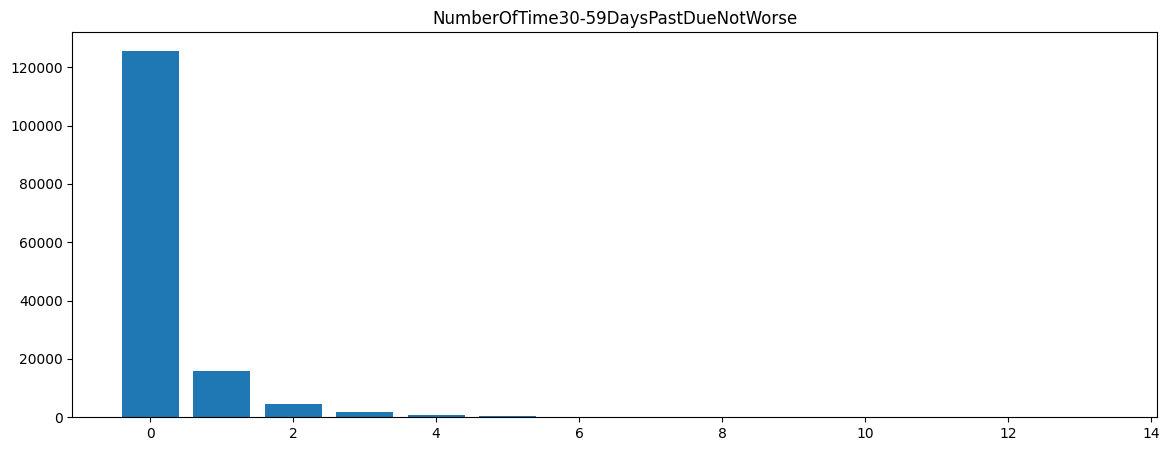

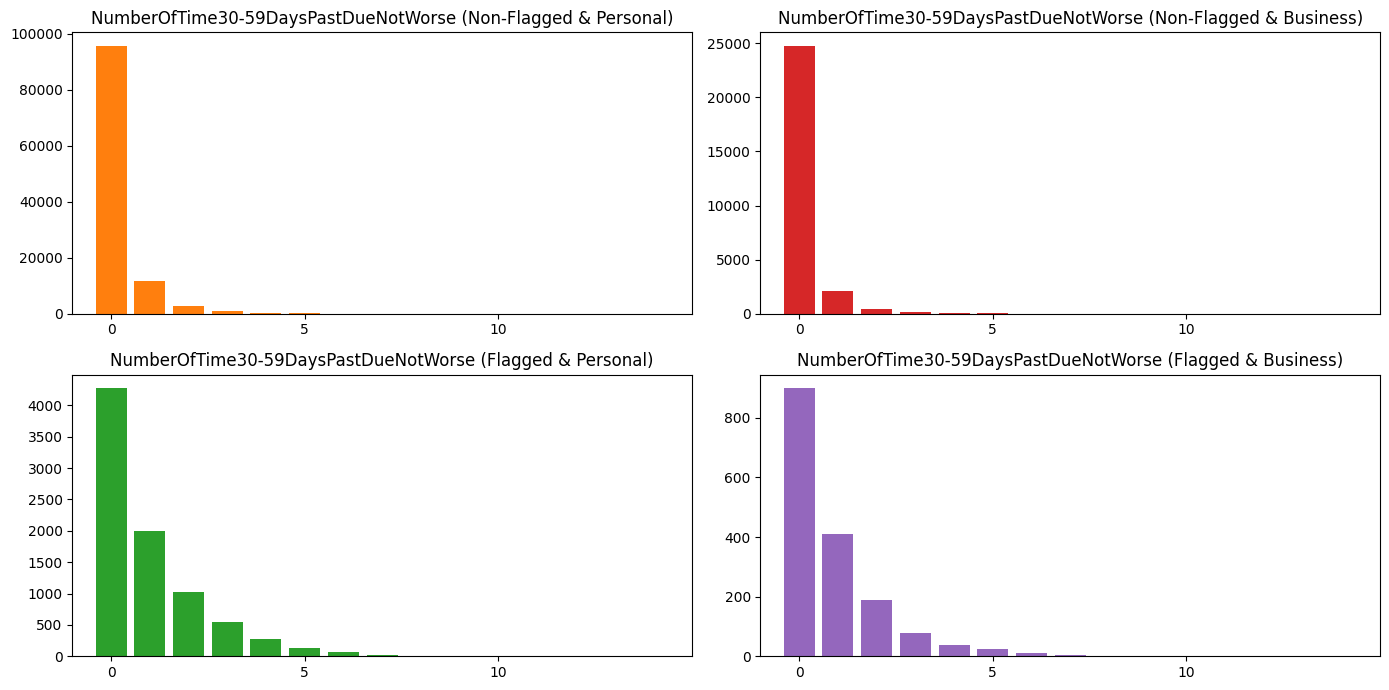

In [54]:
plt.figure(figsize=(14,5))
plt.bar(*np.unique(credit_data["NumberOfTime30-59DaysPastDueNotWorse"], return_counts=True))
plt.title("NumberOfTime30-59DaysPastDueNotWorse")
plt.show()

fig, ax = plt.subplots(2,2, figsize=(14,7))

ax[0,0].bar(*np.unique(credit_data[~flagged & pers]["NumberOfTime30-59DaysPastDueNotWorse"], return_counts=True),
           color='C1')
ax[0,0].set_title("NumberOfTime30-59DaysPastDueNotWorse (Non-Flagged & Personal)")

ax[1,0].bar(*np.unique(credit_data[flagged & pers]["NumberOfTime30-59DaysPastDueNotWorse"], return_counts=True),
           color='C2')
ax[1,0].set_title("NumberOfTime30-59DaysPastDueNotWorse (Flagged & Personal)")

ax[0,1].bar(*np.unique(credit_data[~flagged & ~pers]["NumberOfTime30-59DaysPastDueNotWorse"], return_counts=True),
           color='C3')
ax[0,1].set_title("NumberOfTime30-59DaysPastDueNotWorse (Non-Flagged & Business)")

ax[1,1].bar(*np.unique(credit_data[flagged & ~pers]["NumberOfTime30-59DaysPastDueNotWorse"], return_counts=True),
           color='C4')
ax[1,1].set_title("NumberOfTime30-59DaysPastDueNotWorse (Flagged & Business)")

for axes in ax.reshape(-1):
    axes.set_xlim([-1,15])
    axes.set_xticks(np.arange(0,15,5))

fig.tight_layout()
plt.show()

It seems that the distribution of NumberOfTime30-59DaysPastDueNotWorse is shifted to the right if the customer is flagged (experienced 90 days past due delinquency or worse)

In [55]:
nonzero_num_3059_past = (credit_data["NumberOfTime30-59DaysPastDueNotWorse"] >= 1)

prob_nonzero_num_3059_past = nonzero_num_3059_past.mean()
prob_flagged = flagged.mean()
print(f"Probability of Nonzero Number of 30-59 Days Past Due = {prob_nonzero_num_3059_past}")
print(f"Probability of Flagged = {prob_flagged}\n")

p2 = (nonzero_num_3059_past & flagged).mean()/(nonzero_num_3059_past).mean()
print(f"Probability of Flagged, conditioned on Nonzero Num of 30-59 Days Past Due = {p2}\n")

p4 = (nonzero_num_3059_past & flagged & personal).mean()/(nonzero_num_3059_past & personal).mean()
print(f"Probability of Flagged, conditioned on Nonzero Num of 30-59 Days Past Due & Personal = {p4}\n")

p6 = (nonzero_num_3059_past & flagged & ~personal).mean()/(nonzero_num_3059_past & ~personal).mean()
print(f"Probability of Flagged, conditioned on Nonzero Num of 30-59 Days Past Due & Business = {p6}\n")


Probability of Nonzero Number of 30-59 Days Past Due = 0.15873111499354045
Probability of Flagged = 0.06699868131279663

Probability of Flagged, conditioned on Nonzero Num of 30-59 Days Past Due = 0.20402310968666976

Probability of Flagged, conditioned on Nonzero Num of 30-59 Days Past Due & Personal = 0.2064389284836569

Probability of Flagged, conditioned on Nonzero Num of 30-59 Days Past Due & Business = 0.22746185852981968



From the results above, the odds that a customer will be flagged is more than tripled if they have at least experienced 30-59 past due payments once.

## 4(f) NumberOfTime60-89DaysPastDueNotWorse

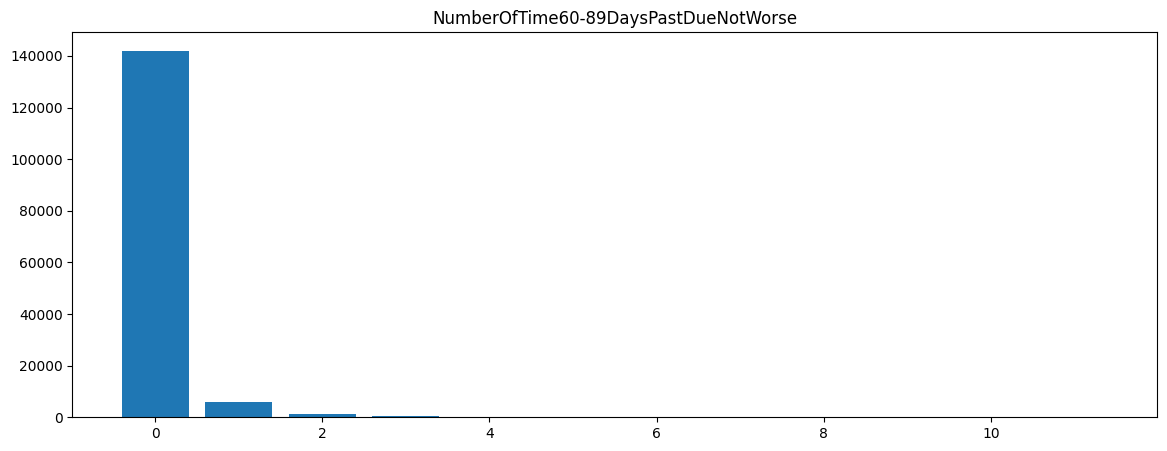

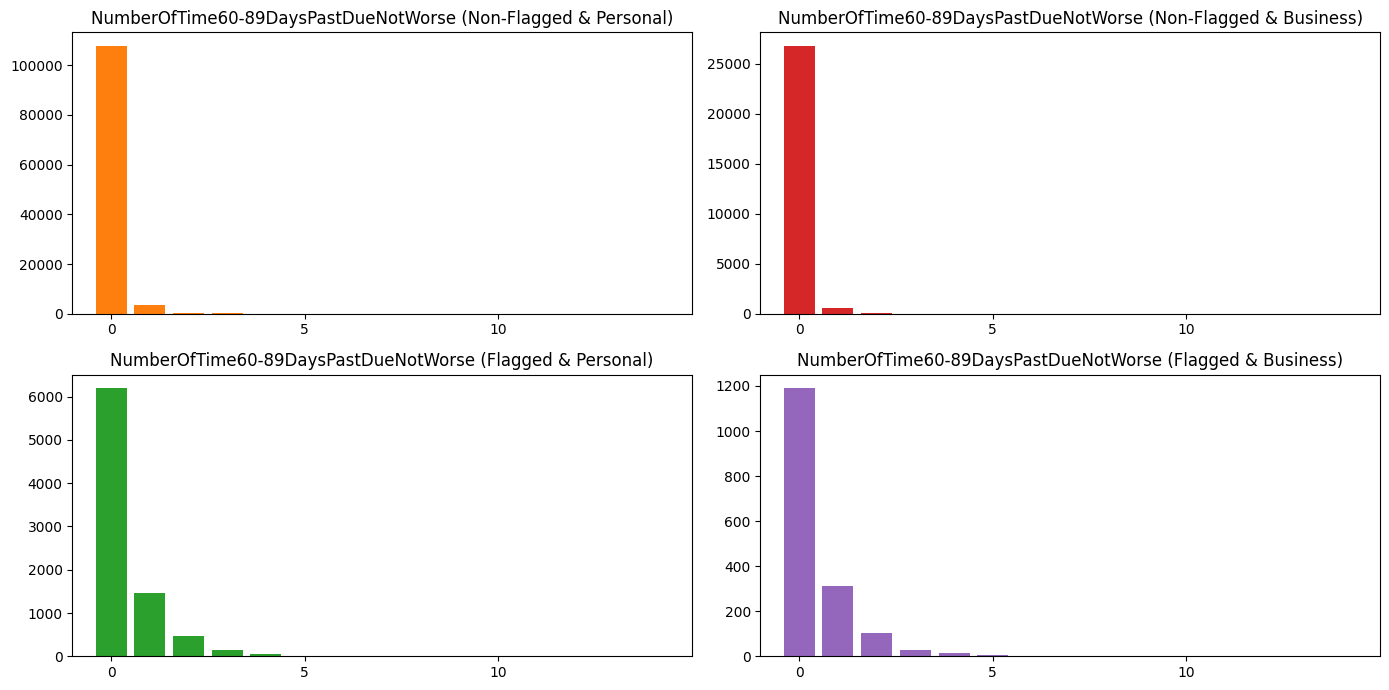

In [56]:
plt.figure(figsize=(14,5))
plt.bar(*np.unique(credit_data["NumberOfTime60-89DaysPastDueNotWorse"], return_counts=True))
plt.title("NumberOfTime60-89DaysPastDueNotWorse")
plt.show()

fig, ax = plt.subplots(2,2, figsize=(14,7))

ax[0,0].bar(*np.unique(credit_data[~flagged & pers]["NumberOfTime60-89DaysPastDueNotWorse"], return_counts=True),
           color='C1')
ax[0,0].set_title("NumberOfTime60-89DaysPastDueNotWorse (Non-Flagged & Personal)")

ax[1,0].bar(*np.unique(credit_data[flagged & pers]["NumberOfTime60-89DaysPastDueNotWorse"], return_counts=True),
           color='C2')
ax[1,0].set_title("NumberOfTime60-89DaysPastDueNotWorse (Flagged & Personal)")

ax[0,1].bar(*np.unique(credit_data[~flagged & ~pers]["NumberOfTime60-89DaysPastDueNotWorse"], return_counts=True),
           color='C3')
ax[0,1].set_title("NumberOfTime60-89DaysPastDueNotWorse (Non-Flagged & Business)")

ax[1,1].bar(*np.unique(credit_data[flagged & ~pers]["NumberOfTime60-89DaysPastDueNotWorse"], return_counts=True),
           color='C4')
ax[1,1].set_title("NumberOfTime60-89DaysPastDueNotWorse (Flagged & Business)")

for axes in ax.reshape(-1):
    axes.set_xlim([-1,15])
    axes.set_xticks(np.arange(0,15,5))

fig.tight_layout()
plt.show()

In [57]:
nonzero_num_6089_past = (credit_data["NumberOfTime60-89DaysPastDueNotWorse"] >= 1)

prob_nonzero_num_6089_past = nonzero_num_6089_past.mean()
prob_flagged = flagged.mean()
print(f"Probability of Nonzero Number of 60-89 Days Past Due = {prob_nonzero_num_6089_past}")
print(f"Probability of Flagged = {prob_flagged}\n")

p2 = (nonzero_num_6089_past & flagged).mean()/(nonzero_num_6089_past).mean()
print(f"Probability of Flagged, conditioned on Nonzero Num of 60-89 Days Past Due = {p2}\n")

p4 = (nonzero_num_6089_past & flagged & personal).mean()/(nonzero_num_6089_past & personal).mean()
print(f"Probability of Flagged, conditioned on Nonzero Num of 60-89 Days Past Due & Personal = {p4}\n")

p6 = (nonzero_num_6089_past & flagged & ~personal).mean()/(nonzero_num_6089_past & ~personal).mean()
print(f"Probability of Flagged, conditioned on Nonzero Num of 60-89 Days Past Due & Business = {p6}\n")


Probability of Nonzero Number of 60-89 Days Past Due = 0.04909934333393578
Probability of Flagged = 0.06699868131279663

Probability of Flagged, conditioned on Nonzero Num of 60-89 Days Past Due = 0.35760054533060665

Probability of Flagged, conditioned on Nonzero Num of 60-89 Days Past Due & Personal = 0.35418359057676685

Probability of Flagged, conditioned on Nonzero Num of 60-89 Days Past Due & Business = 0.4621513944223108



From the results above, the odds that a customer will be flagged is increased six times if they have at least experienced 60-89 days past due payments once.

## 4(g) NumberOfTimes90DaysLate

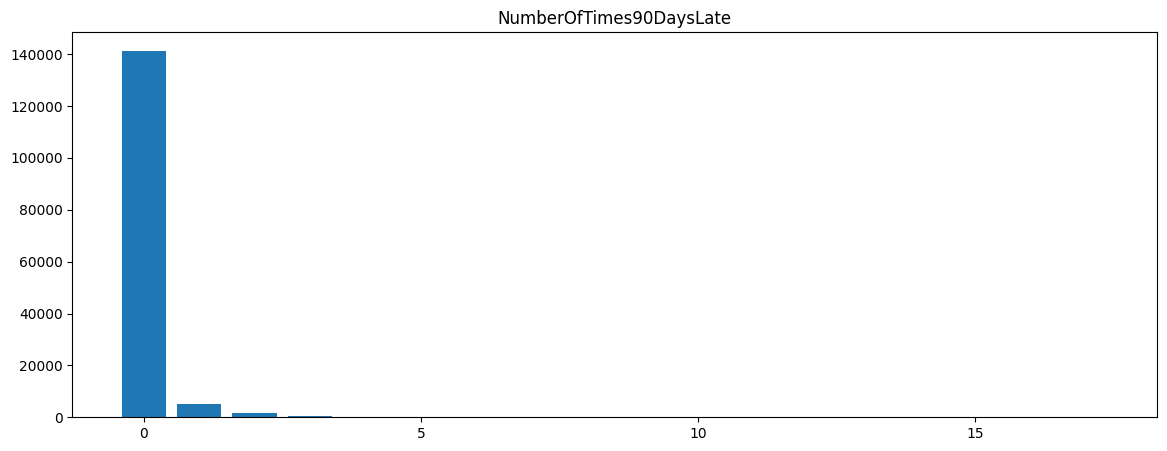

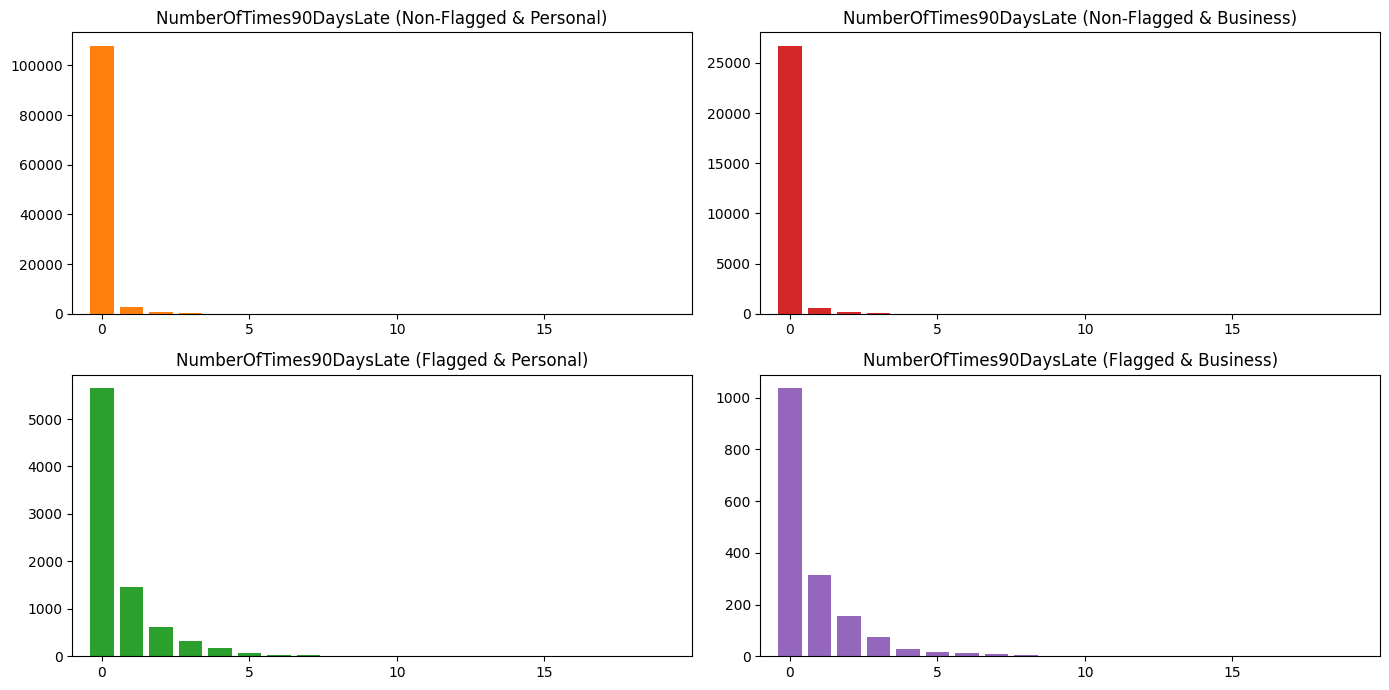

In [58]:
plt.figure(figsize=(14,5))
plt.bar(*np.unique(credit_data["NumberOfTimes90DaysLate"], return_counts=True))
plt.title("NumberOfTimes90DaysLate")
plt.xticks(np.arange(0,20,5))
plt.show()

fig, ax = plt.subplots(2,2, figsize=(14,7))

ax[0,0].bar(*np.unique(credit_data[~flagged & pers]["NumberOfTimes90DaysLate"], return_counts=True),
           color='C1')
ax[0,0].set_title("NumberOfTimes90DaysLate (Non-Flagged & Personal)")

ax[1,0].bar(*np.unique(credit_data[flagged & pers]["NumberOfTimes90DaysLate"], return_counts=True),
           color='C2')
ax[1,0].set_title("NumberOfTimes90DaysLate (Flagged & Personal)")

ax[0,1].bar(*np.unique(credit_data[~flagged & ~pers]["NumberOfTimes90DaysLate"], return_counts=True),
           color='C3')
ax[0,1].set_title("NumberOfTimes90DaysLate (Non-Flagged & Business)")

ax[1,1].bar(*np.unique(credit_data[flagged & ~pers]["NumberOfTimes90DaysLate"], return_counts=True),
           color='C4')
ax[1,1].set_title("NumberOfTimes90DaysLate (Flagged & Business)")

for axes in ax.reshape(-1):
    axes.set_xlim([-1,20])
    axes.set_xticks(np.arange(0,20,5))

fig.tight_layout()
plt.show()

In [59]:
nonzero_num_90_past = (credit_data["NumberOfTimes90DaysLate"] >= 1)

prob_nonzero_num_90_past = nonzero_num_90_past.mean()
prob_flagged = flagged.mean()
print(f"Probability of Nonzero Number of >=90 Days Past Due = {prob_nonzero_num_90_past}")
print(f"Probability of Flagged = {prob_flagged}\n")

p2 = (nonzero_num_90_past & flagged).mean()/(nonzero_num_90_past).mean()
print(f"Probability of Flagged, conditioned on Nonzero Num of >= 90 Days Past Due = {p2}\n")

p4 = (nonzero_num_90_past & flagged & personal).mean()/(nonzero_num_90_past & personal).mean()
print(f"Probability of Flagged, conditioned on Nonzero Num of >=90 Days Past Due & Personal = {p4}\n")

p6 = (nonzero_num_90_past & flagged & ~personal).mean()/(nonzero_num_90_past & ~personal).mean()
print(f"Probability of Flagged, conditioned on Nonzero Num of >= 90 Days Past Due & Business = {p6}\n")


Probability of Nonzero Number of >=90 Days Past Due = 0.05393899230877362
Probability of Flagged = 0.06699868131279663

Probability of Flagged, conditioned on Nonzero Num of >= 90 Days Past Due = 0.41250930752047654

Probability of Flagged, conditioned on Nonzero Num of >=90 Days Past Due & Personal = 0.40936555891238674

Probability of Flagged, conditioned on Nonzero Num of >= 90 Days Past Due & Business = 0.4529616724738676



From the results above, the odds that a customer will be flagged is increased seven times if they have at least experienced >=90 days past due payments once.

# 5. Continuous Features Analysis

In [60]:
credit_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'TypeCustomer'],
      dtype='object')

In [61]:
continuous = ['DebtRatio',
              'RevolvingUtilizationOfUnsecuredLines',
              'MonthlyIncome',
              'age']

credit_data[continuous].describe()

,DebtRatio,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,age
count,149391.000000,149391.000000,1.493910e+05,149391.000000
mean,354.436740,6.071087,5.369444e+03,52.306585
std,2041.843455,250.263672,1.317457e+04,14.725340
min,0.000000,0.000000,0.000000e+00,21.000000
25%,0.177441,0.030132,1.600000e+03,41.000000
50%,0.368234,0.154235,4.400000e+03,52.000000
75%,0.875279,0.556494,7.400000e+03,63.000000
max,329664.000000,50708.000000,3.008750e+06,109.000000


## 5(a) Debt Ratio

In [62]:
nonzero_dr = credit_data["DebtRatio"] > 0
nonzero_dr.mean()

0.9764711394930082

In [63]:
(~nonzero_dr).sum()

3515

In [64]:
p1 = (~nonzero_dr & pers).mean()/(pers).mean()

print(f"Probability of zero DebtRatio given customer type Personal = {p1}")

p2 = (~nonzero_dr & ~pers).mean()/(~pers).mean()

print(f"Probability of zero DebtRatio given customer type Business = {p2}")

Probability of zero DebtRatio given customer type Personal = 0.019921777481900643
Probability of zero DebtRatio given customer type Business = 0.03836282125868382


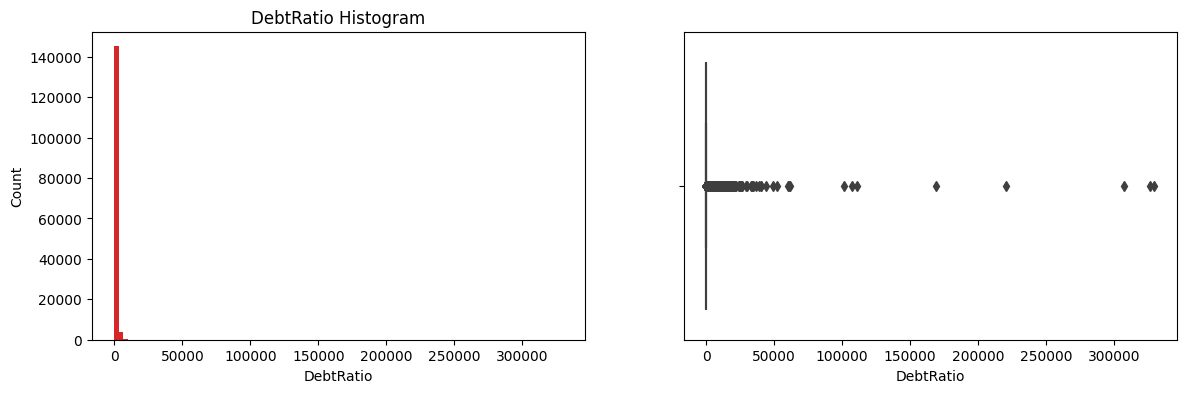

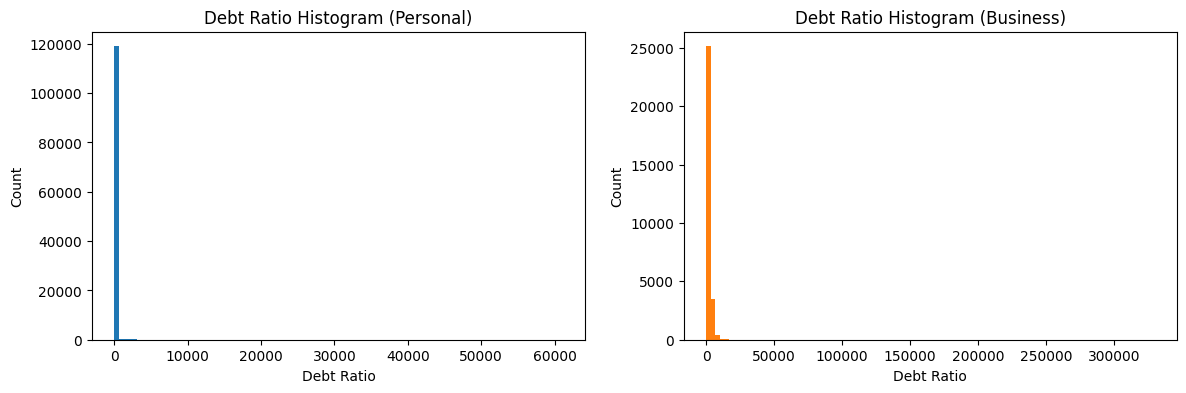

In [65]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

ax[0].hist(credit_data["DebtRatio"], bins = 100, color='C3')
ax[0].set_title("DebtRatio Histogram")
ax[0].set_xlabel("DebtRatio")
ax[0].set_ylabel("Count")

ax[1] = sns.boxplot(data=credit_data, x='DebtRatio')

plt.show()

fig, ax = plt.subplots(1,2,figsize=(14,4))

ax[0].hist(credit_data[pers]["DebtRatio"], bins = 100, color='C0')
ax[0].set_title("Debt Ratio Histogram (Personal)")

ax[1].hist(credit_data[~pers]["DebtRatio"], bins = 100, color='C1')
ax[1].set_title("Debt Ratio Histogram (Business)")

for j in range(2):
    ax[j].set_xlabel("Debt Ratio")
    ax[j].set_ylabel("Count")
    
plt.show()

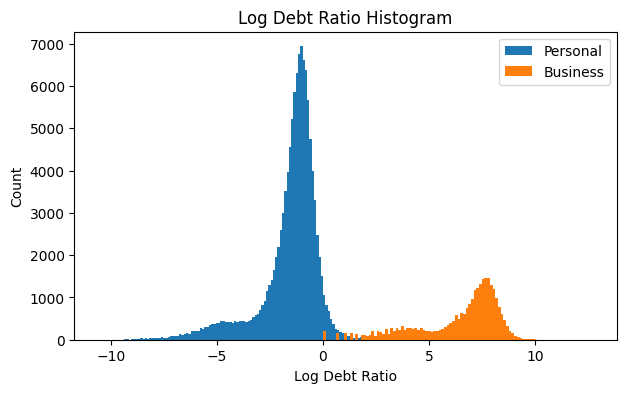

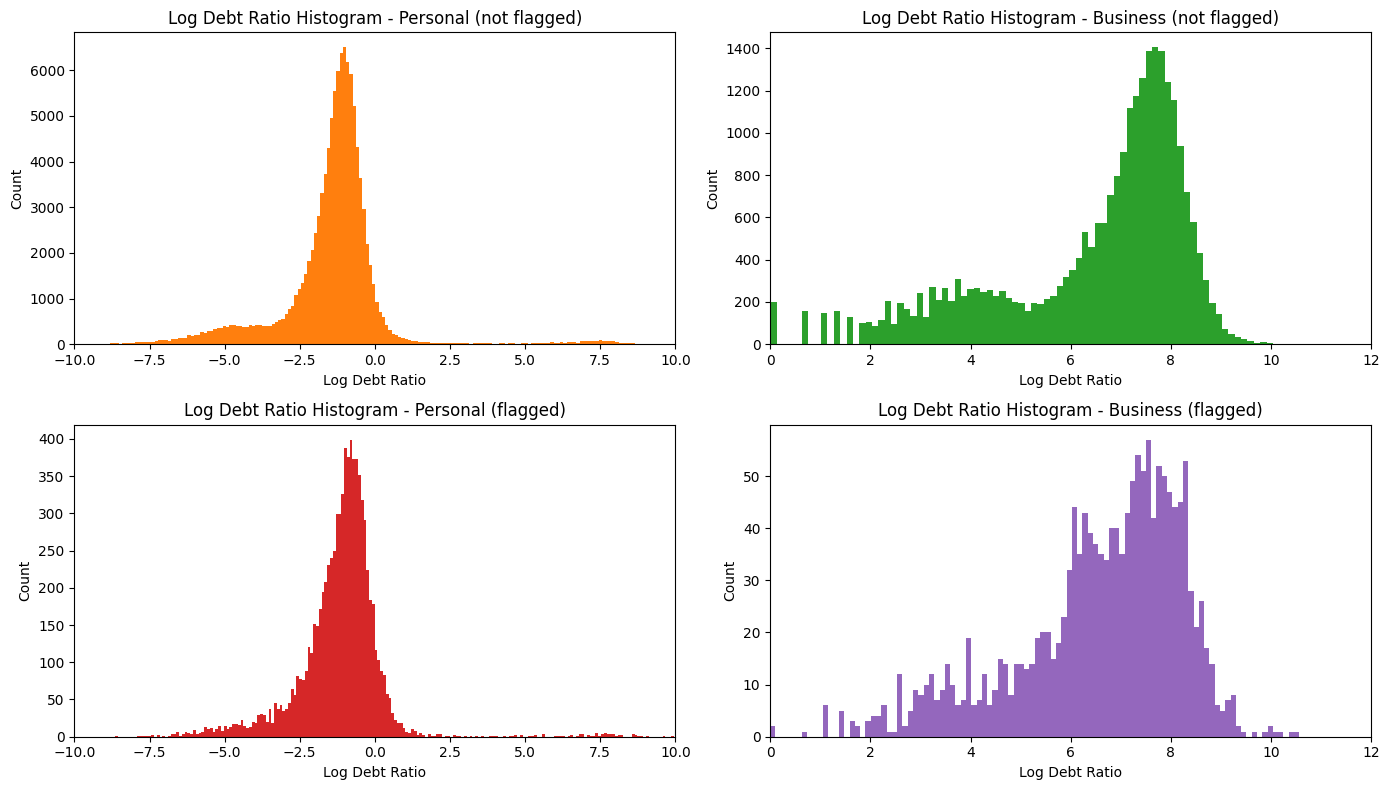

In [66]:
plt.figure(figsize=(7,4))
plt.hist(np.log(credit_data[nonzero_dr & pers]["DebtRatio"]), bins = 200, label='Personal')
plt.hist(np.log(credit_data[nonzero_dr & ~pers]["DebtRatio"]), bins = 100, label='Business')
plt.title("Log Debt Ratio Histogram")
plt.xlabel("Log Debt Ratio")
plt.ylabel("Count")
plt.legend()

plt.show()

fig, ax = plt.subplots(2,2, figsize=(14,8))

ax[0,0].hist(np.log(credit_data[nonzero_dr & pers & ~flagged]["DebtRatio"]), bins = 200, color='C1')
ax[0,0].set_title("Log Debt Ratio Histogram - Personal (not flagged)")

ax[0,1].hist(np.log(credit_data[nonzero_dr & ~pers & ~flagged]["DebtRatio"]), bins = 100, color = 'C2')
ax[0,1].set_title("Log Debt Ratio Histogram - Business (not flagged)")

ax[1,0].hist(np.log(credit_data[nonzero_dr & pers & flagged]["DebtRatio"]), bins = 200, color='C3')
ax[1,0].set_title("Log Debt Ratio Histogram - Personal (flagged)")

ax[1,1].hist(np.log(credit_data[nonzero_dr & ~pers & flagged]["DebtRatio"]), bins = 100, color = 'C4')
ax[1,1].set_title("Log Debt Ratio Histogram - Business (flagged)")

for axes in ax.reshape(-1):
    axes.set_xlabel("Log Debt Ratio")
    axes.set_ylabel("Count")
    
for j in range(2):
    ax[j,0].set_xlim([-10,10])
    ax[j,1].set_xlim([-0,12])

fig.tight_layout()
plt.show()

In [67]:
prob_zero_dr = (~nonzero_dr).mean()

print(f'Probability of 0 DebtRatio: {prob_zero_dr}')

Probability of 0 DebtRatio: 0.023528860506991718


In [68]:
from scipy.stats import norm

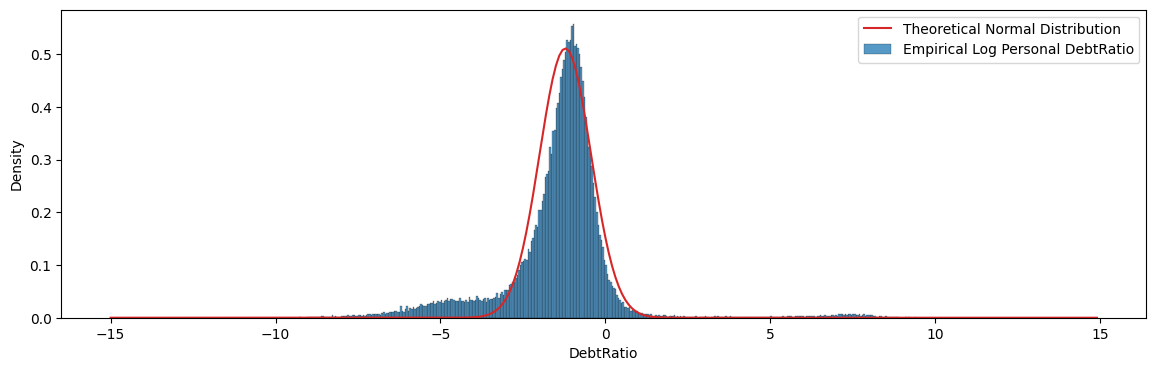

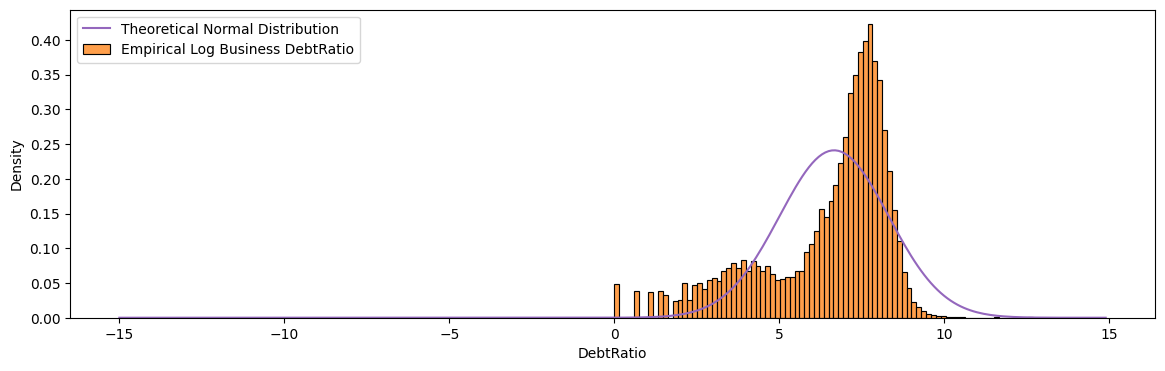

In [69]:
for k, cust in enumerate(["Personal", "Business"]):
    
    cust_type = (credit_data["TypeCustomer"] == k)

    log_debtratio = np.log(credit_data[nonzero_dr & cust_type]["DebtRatio"])

    q1 = log_debtratio.quantile(0.25)
    q3 = log_debtratio.quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR

    p1 = log_debtratio.quantile(0.025)
    p2 = log_debtratio.quantile(0.975)

    inside_whisker = (log_debtratio > lower) & (log_debtratio < upper)

    # create normal distribution plot

    x_axis = np.arange(-15, 15, 0.1)

    mean = log_debtratio[inside_whisker].mean()
    sd = log_debtratio[inside_whisker].std()

    plt.figure(figsize=(14,4))    
    sns.histplot(x=log_debtratio, stat='density', color=f'C{k}', label=f'Empirical Log {cust} DebtRatio')
    plt.plot(x_axis, norm.pdf(x_axis, mean, sd), color=f'C{k+3}', label='Theoretical Normal Distribution')
    plt.legend()
    plt.show()

In [70]:
print(f'Mean of Normal Distribution: {mean:1.2f}')
print(f'Standard Deviation of Normal Distribution: {sd:1.2f}')

Mean of Normal Distribution: 6.67
Standard Deviation of Normal Distribution: 1.65


## 5(b) RevolvingUtilizationOfUnsecuredLines

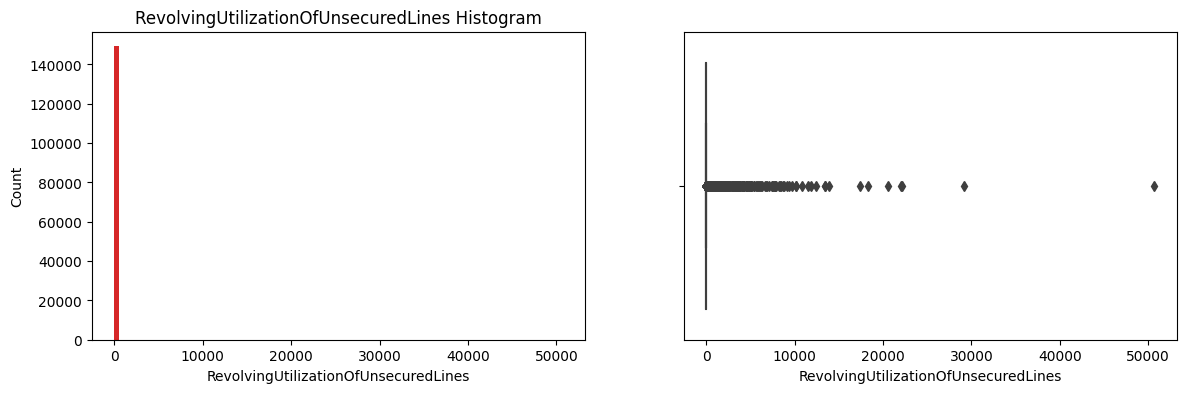

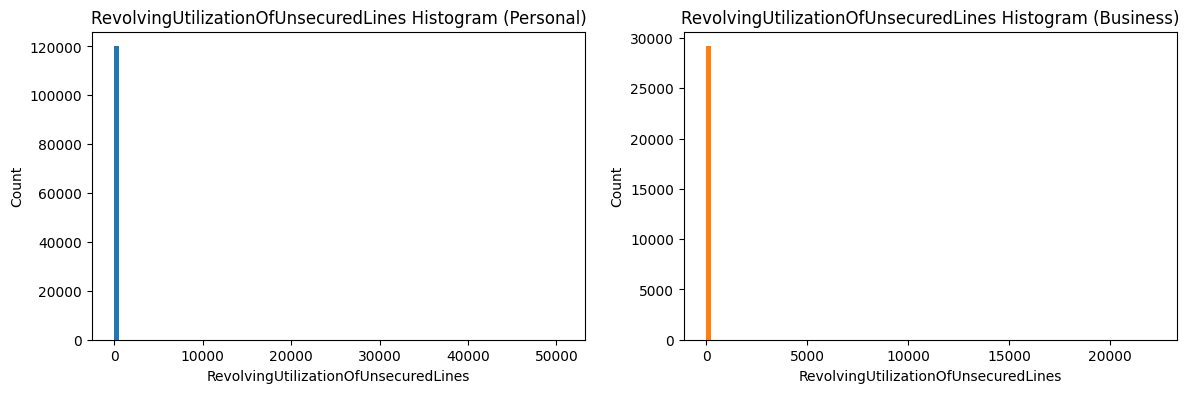

In [71]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

ax[0].hist(credit_data["RevolvingUtilizationOfUnsecuredLines"], bins = 100, color='C3')
ax[0].set_title("RevolvingUtilizationOfUnsecuredLines Histogram")
ax[0].set_xlabel("RevolvingUtilizationOfUnsecuredLines")
ax[0].set_ylabel("Count")

ax[1] = sns.boxplot(data=credit_data, x='RevolvingUtilizationOfUnsecuredLines')

plt.show()

fig, ax = plt.subplots(1,2,figsize=(14,4))

ax[0].hist(credit_data[pers]["RevolvingUtilizationOfUnsecuredLines"], bins = 100, color='C0')
ax[0].set_title("RevolvingUtilizationOfUnsecuredLines Histogram (Personal)")

ax[1].hist(credit_data[~pers]["RevolvingUtilizationOfUnsecuredLines"], bins = 100, color='C1')
ax[1].set_title("RevolvingUtilizationOfUnsecuredLines Histogram (Business)")

for j in range(2):
    ax[j].set_xlabel("RevolvingUtilizationOfUnsecuredLines")
    ax[j].set_ylabel("Count")
    
plt.show()

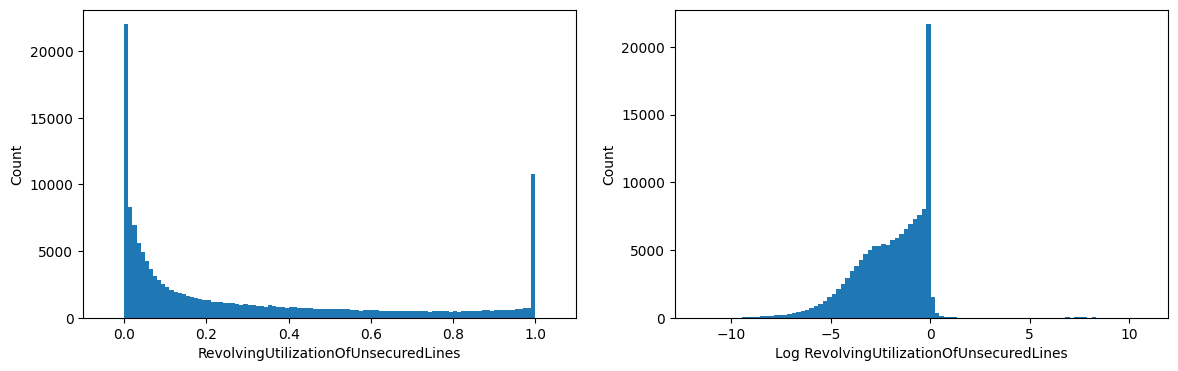

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

less_1_revolving = credit_data["RevolvingUtilizationOfUnsecuredLines"] <= 1
nonzero_revolving = credit_data["RevolvingUtilizationOfUnsecuredLines"] > 0

ax[0].hist(credit_data[less_1_revolving]["RevolvingUtilizationOfUnsecuredLines"],
         bins = 100)
ax[0].set_xlim([-0.1,1.1])
ax[0].set_xlabel("RevolvingUtilizationOfUnsecuredLines")
ax[0].set_ylabel("Count")

ax[1].hist(np.log(credit_data[nonzero_revolving]["RevolvingUtilizationOfUnsecuredLines"]),
         bins = 100)
ax[1].set_xlabel("Log RevolvingUtilizationOfUnsecuredLines")
ax[1].set_ylabel("Count")

plt.show()

In [73]:
prob_0 = (~nonzero_revolving).mean()
thres = 0.99999
around_1_revolving = (credit_data["RevolvingUtilizationOfUnsecuredLines"] > thres) &  (credit_data["RevolvingUtilizationOfUnsecuredLines"] <= 1)
prob_around_1 = around_1_revolving.mean()

print(f'Probability of 0 RevolvingUtilizationOfUnsecuredLines: {prob_0:1.3f}')
print(f'Probability of {thres}-1 RevolvingUtilizationOfUnsecuredLines: {prob_around_1:1.3f}')

Probability of 0 RevolvingUtilizationOfUnsecuredLines: 0.071
Probability of 0.99999-1 RevolvingUtilizationOfUnsecuredLines: 0.067


In [74]:
p = (flagged & ~less_1_revolving).mean()/(~less_1_revolving).mean()

print(f'Probability of Flagged customer, given greater than 1 RevolvingUtilizationOfUnsecuredLines: {p:1.3f}')

Probability of Flagged customer, given greater than 1 RevolvingUtilizationOfUnsecuredLines: 0.372


In [75]:
(~less_1_revolving).mean()

0.022230254834628593

## 5(c) Monthly Income

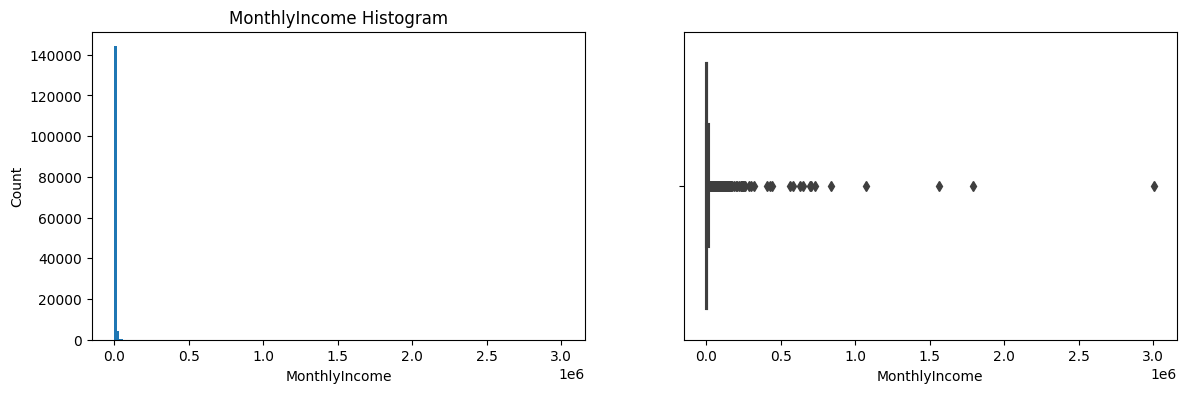

In [76]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

ax[0].hist(credit_data["MonthlyIncome"], bins = 200)
ax[0].set_title("MonthlyIncome Histogram")
ax[0].set_xlabel("MonthlyIncome")
ax[0].set_ylabel("Count")

ax[1] = sns.boxplot(data=credit_data, x='MonthlyIncome')

plt.show()

In [77]:
pers = (credit_data["TypeCustomer"]=='Personal')
zero_inc = (credit_data[pers]["MonthlyIncome"] == 0)
p = zero_inc.mean()

print(f'Probability of 0 income among Personal-type customers: {p:1.4f}')

Probability of 0 income among Personal-type customers: nan


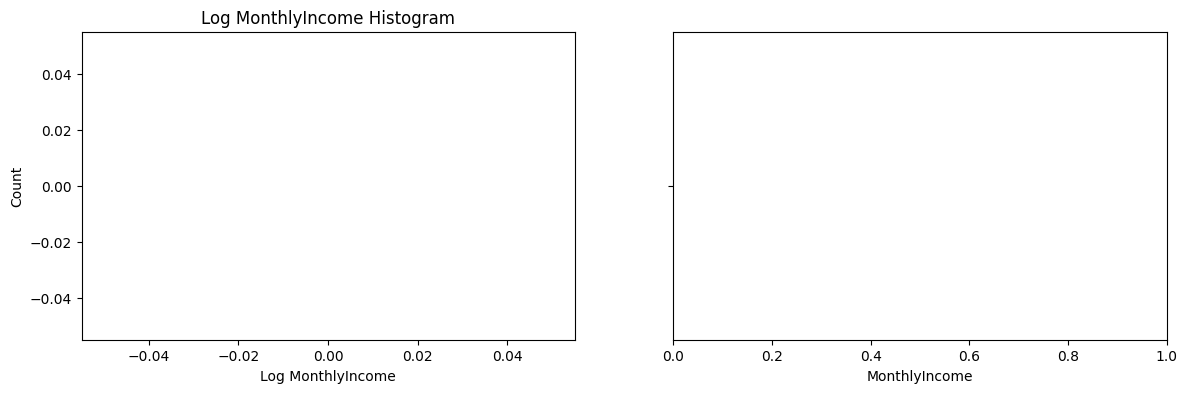

In [78]:
pers = (credit_data["TypeCustomer"]=='Personal')
non_zero_income = (credit_data["MonthlyIncome"] > 0) & (pers)
fig, ax = plt.subplots(1,2,figsize=(14,4))

log_income = np.log(credit_data[non_zero_income]["MonthlyIncome"])

sns.histplot(x=log_income, ax=ax[0])
ax[0].set_title("Log MonthlyIncome Histogram")
ax[0].set_xlabel("Log MonthlyIncome")
ax[0].set_ylabel("Count")

sns.boxplot(x=log_income, ax=ax[1])

plt.show()

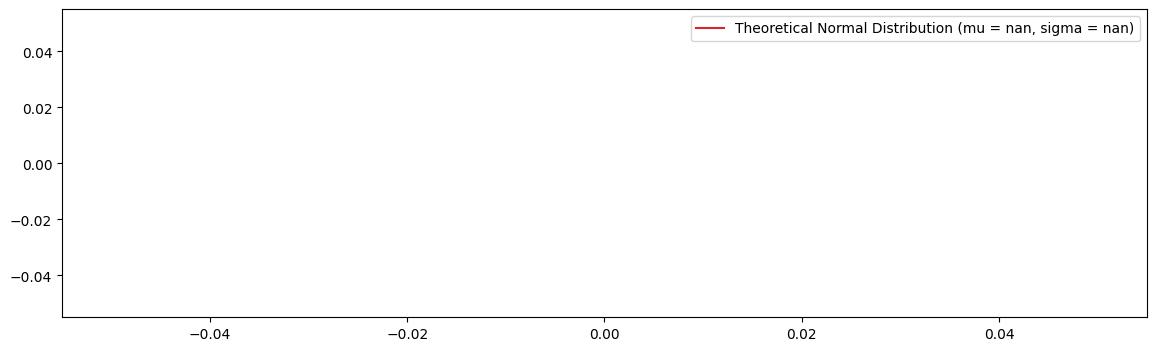

In [79]:
q1 = log_income.quantile(0.25)
q3 = log_income.quantile(0.75)
IQR = q3 - q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

inside_whisker = (log_income > lower) & (log_income < upper)

# create normal distribution plot

x_axis = np.arange(-1, 15, 0.1)

mean = log_income[inside_whisker].mean()
sd = log_income[inside_whisker].std()

cust = 'Personal'

plt.figure(figsize=(14,4))    
sns.histplot(x=log_income, stat='density', label=f'Empirical Log MonthlyIncome ({cust})')
plt.plot(x_axis, norm.pdf(x_axis, mean, sd), color='C3', label=f'Theoretical Normal Distribution (mu = {mean:1.2f}, sigma = {sd:1.2f})')
plt.legend()
plt.show()

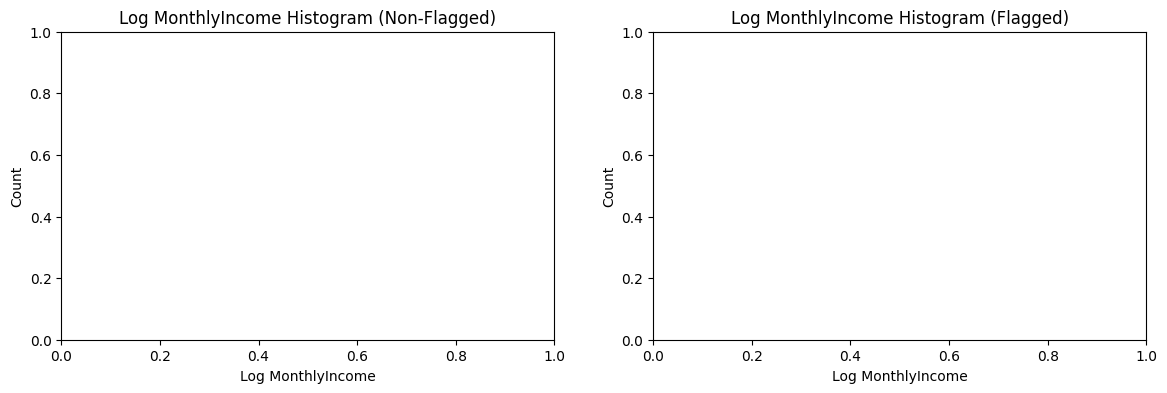

In [80]:
pers = (credit_data["TypeCustomer"]=='Personal')
non_zero_income = (credit_data["MonthlyIncome"] > 0) & (pers)
fig, ax = plt.subplots(1,2,figsize=(14,4))

for k, loan_status in enumerate(["Non-Flagged", "Flagged"]):

    status = (credit_data['SeriousDlqin2yrs'] == k)
    log_income = np.log(credit_data[non_zero_income & status]["MonthlyIncome"])

    sns.histplot(x=log_income, ax=ax[k], color=f'C{k}')
    ax[k].set_title(f'Log MonthlyIncome Histogram ({loan_status})')
    ax[k].set_xlabel("Log MonthlyIncome")
    ax[k].set_ylabel("Count")

plt.show()